In [26]:
!uv pip install geodatasets -q

# Import Libraries

In [27]:
# core
import numpy as np
import pandas as pd
import geopandas as gpd

# dataset
import geodatasets

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Description

- 본 프로젝트는 전 세계 국가를 대상으로 조사된 2015년 World Happiness Report 데이터를 사용한다.

## Data Overview

In [16]:
happiness_2015_df = pd.read_csv('../data/2015.csv')

happiness_2015_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [17]:
happiness_2015_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    str    
 1   Region                         158 non-null    str    
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), str(2)
memory usage: 14.9 KB


## Missing Values Analysis

In [18]:
happiness_2015_df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

## Data Quality Check

In [19]:
# non object dtype check describe
happiness_2015_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [20]:
# object dtype describe
happiness_2015_df.describe(include=['str'])

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


## Univariate Analysis

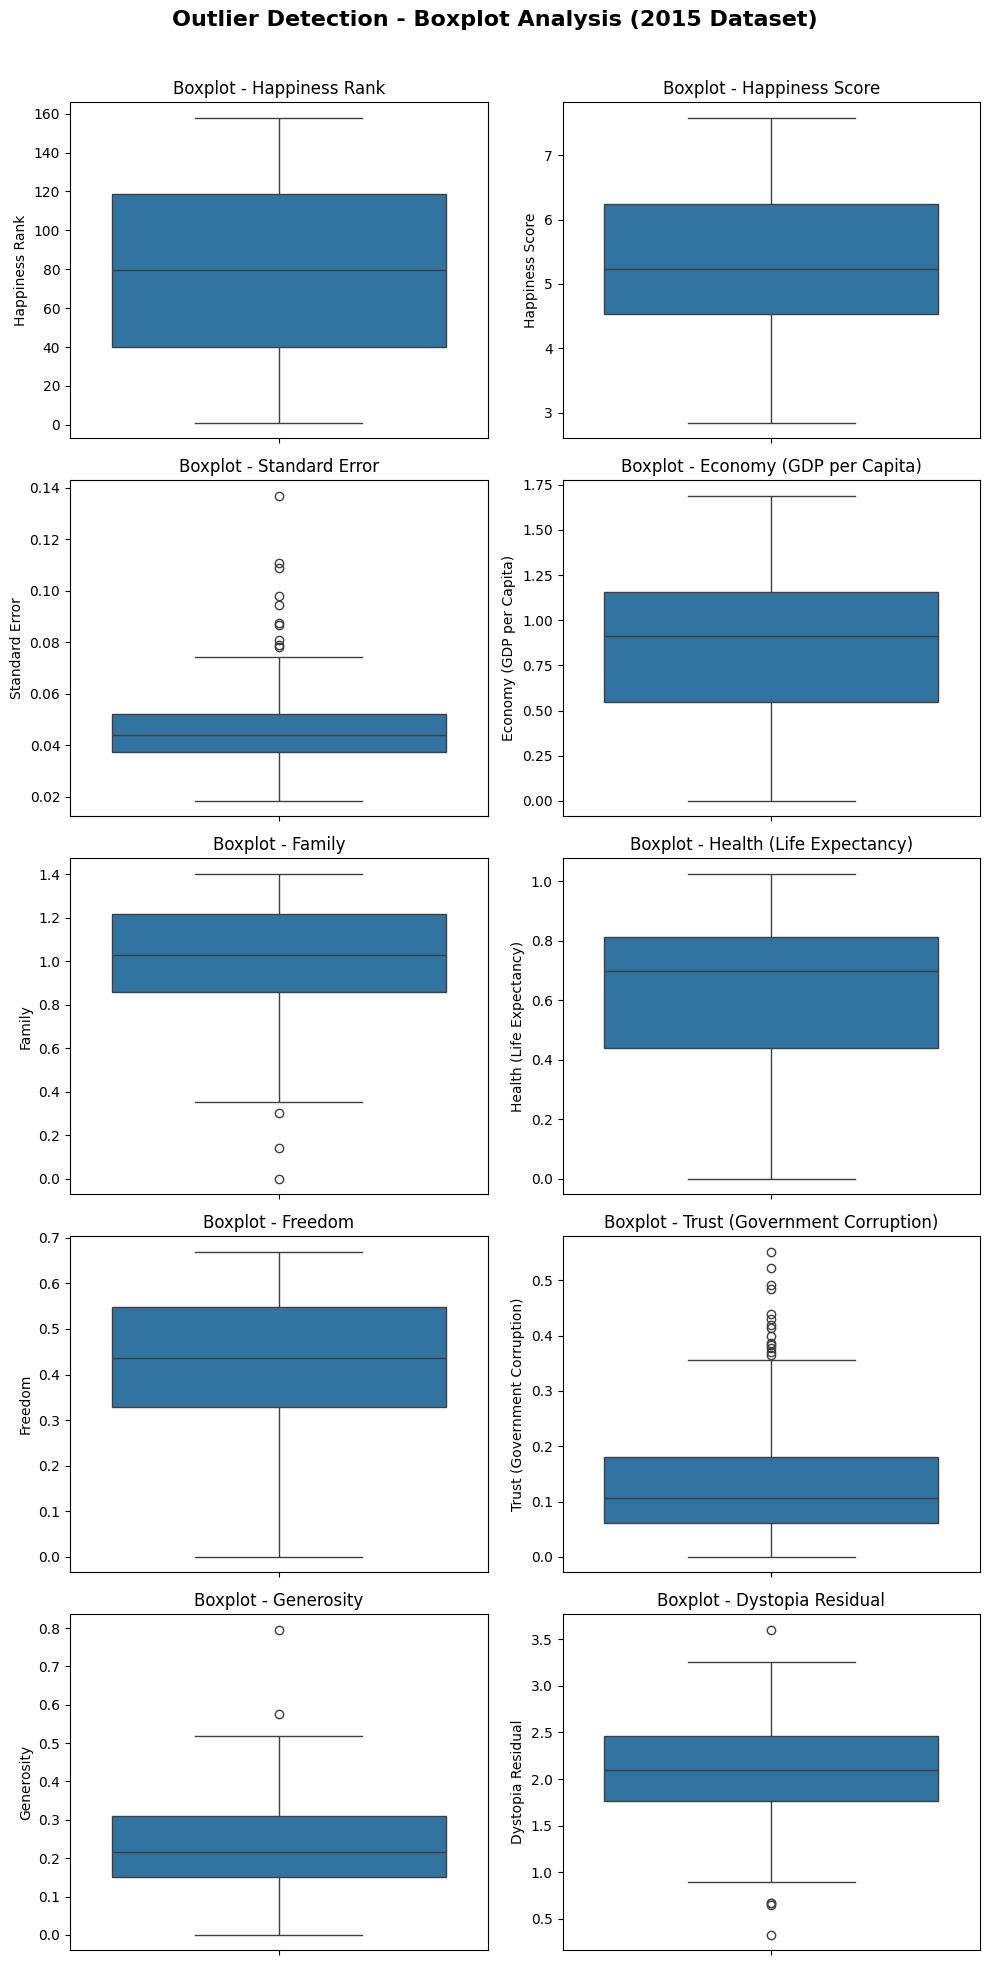

In [21]:
numerical_cols = happiness_2015_df.select_dtypes(include=['int64', 'float64']).columns

fig, ax = plt.subplots(5, 2, figsize=(10, 20))

plt.suptitle("Outlier Detection - Boxplot Analysis (2015 Dataset)",
             fontsize=16, fontweight="bold")

for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2

    sns.boxplot(happiness_2015_df[col], ax=ax[row, col_idx])
    ax[row, col_idx].set_title(f"Boxplot - {col}")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

범위를 벗어나는 값들이 있어서 상관 관계를 파악

## Happiness Rank and Happiness Score consistency check

In [40]:
# import geo map
world_df = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")

world_df.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,NaN,NaN,Unrecognized,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [47]:
world.info(verbose=True, show_counts=True, max_cols=None)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 169 columns):
 #    Column      Non-Null Count  Dtype   
---   ------      --------------  -----   
 0    featurecla  177 non-null    str     
 1    scalerank   177 non-null    int32   
 2    LABELRANK   177 non-null    int32   
 3    SOVEREIGNT  177 non-null    str     
 4    SOV_A3      177 non-null    str     
 5    ADM0_DIF    177 non-null    int32   
 6    LEVEL       177 non-null    int32   
 7    TYPE        177 non-null    str     
 8    TLC         176 non-null    str     
 9    ADMIN       177 non-null    str     
 10   ADM0_A3     177 non-null    str     
 11   GEOU_DIF    177 non-null    int32   
 12   GEOUNIT     177 non-null    str     
 13   GU_A3       177 non-null    str     
 14   SU_DIF      177 non-null    int32   
 15   SUBUNIT     177 non-null    str     
 16   SU_A3       177 non-null    str     
 17   BRK_DIFF    177 non-null    int32   
 18   NAME        177 non-

In [42]:
world_df.describe(include=['str'])

,featurecla,SOVEREIGNT,SOV_A3,TYPE,TLC,ADMIN,ADM0_A3,GEOUNIT,GU_A3,SUBUNIT,...,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA
count,177,177,177,177,176,177,177,177,177,177,...,3,4,5,4,3,3,4,3,6,3
unique,1,171,171,6,1,177,177,177,177,177,...,1,2,2,2,1,2,2,2,3,1
top,Admin-0 country,France,FR1,Sovereign country,1,Fiji,FJI,Fiji,FJI,Fiji,...,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized,Unrecognized
freq,177,3,3,156,176,1,1,1,1,1,...,3,2,4,3,3,2,3,2,3,3


In [55]:
world_df = world_df[['NAME_EN', 'ISO_A3','REGION_UN', 'SUBREGION','geometry']]

world_df.head()

,NAME_EN,ISO_A3,REGION_UN,SUBREGION,geometry
0,Fiji,FJI,Oceania,Melanesia,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Tanzania,TZA,Africa,Eastern Africa,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Western Sahara,ESH,Africa,Northern Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,Americas,Northern America,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,United States of America,USA,Americas,Northern America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [56]:
world_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

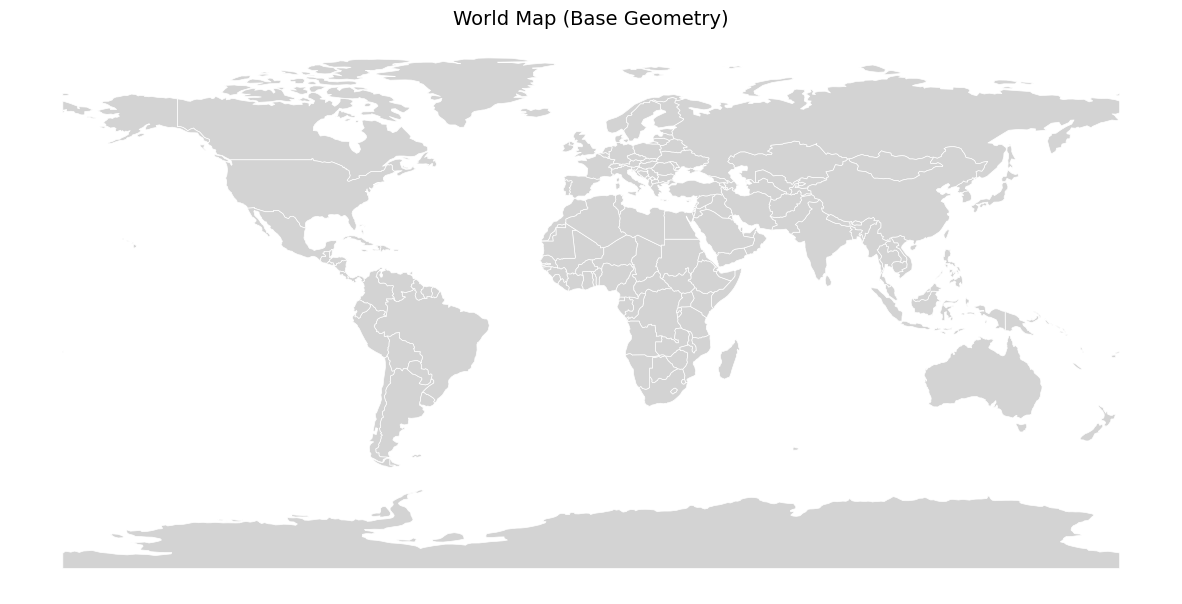

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

world_df.plot(
    ax=ax,
    color="lightgray",
    edgecolor="white",
    linewidth=0.5
)

ax.set_title("World Map (Base Geometry)", fontsize=14)
ax.set_axis_off()

plt.show()

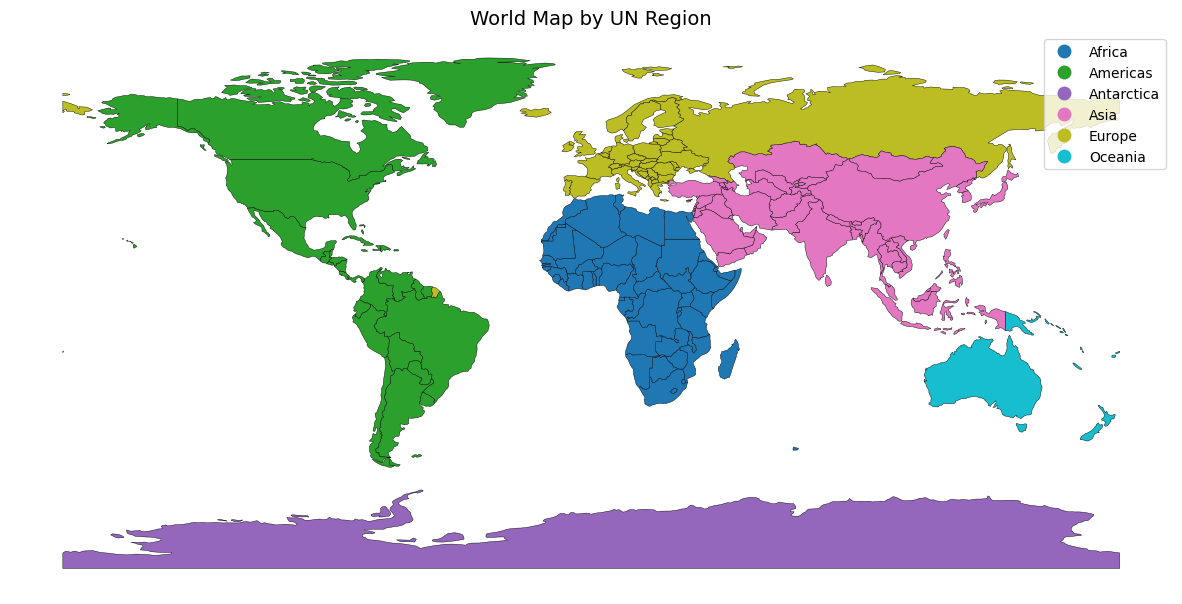

In [58]:
fig, ax = plt.subplots(figsize=(15, 8))

world_df.plot(
    column="REGION_UN",
    categorical=True,
    legend=True,
    ax=ax,
    edgecolor="black",
    linewidth=0.3
)

ax.set_title("World Map by UN Region", fontsize=14)
ax.set_axis_off()

plt.show()

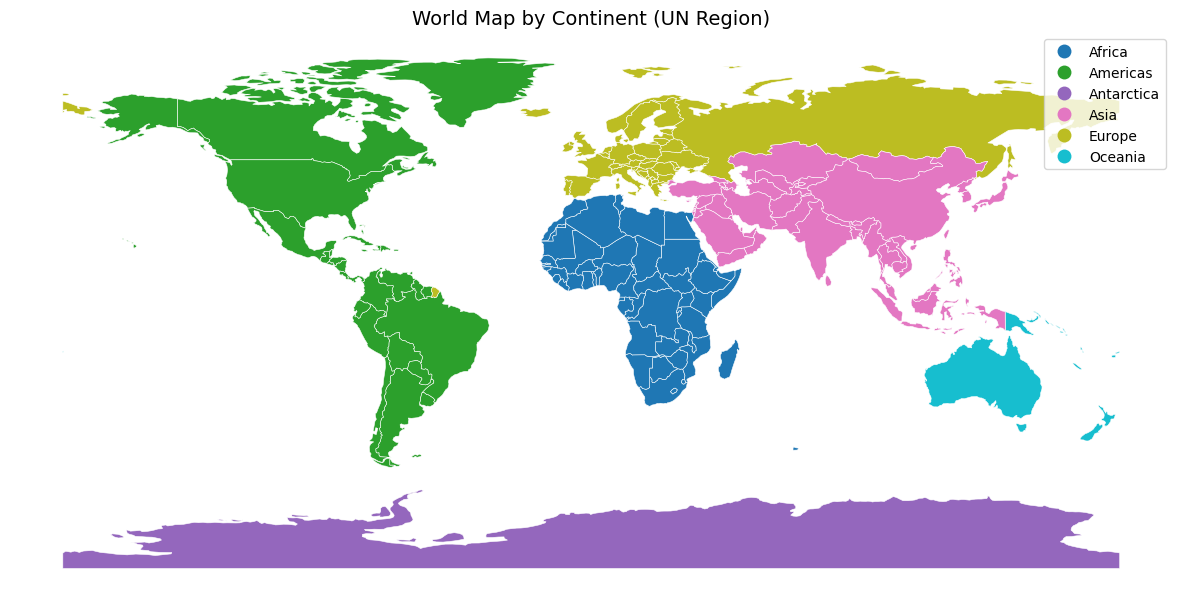

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))

world_df.plot(
    column="REGION_UN",
    categorical=True,
    cmap="tab10",
    legend=True,
    ax=ax,
    edgecolor="white",
    linewidth=0.4
)

ax.set_title("World Map by Continent (UN Region)", fontsize=14)
ax.set_axis_off()

plt.show()

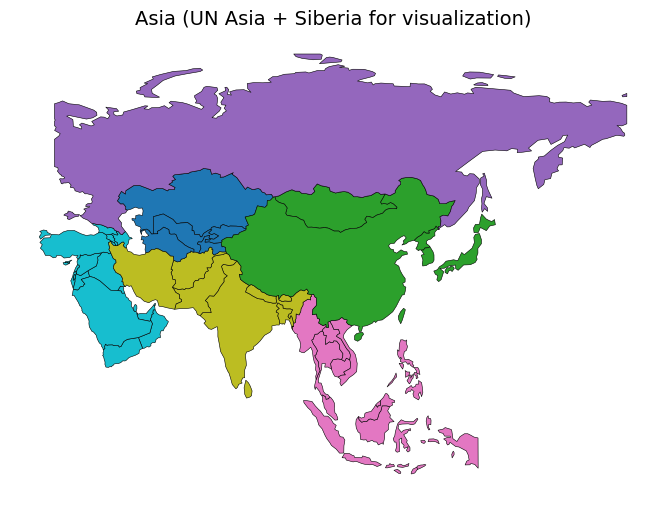

In [78]:
from shapely.geometry import box

# 대략적인 아시아 영역 (시베리아 포함)
asia_bbox = box(30, 0, 180, 80)
# (min_lon, min_lat, max_lon, max_lat)

asia_df = world_df[world_df["REGION_UN"] == "Asia"]
russia_df = world_df[world_df["ISO_A3"] == "RUS"]

asia_bbox_gdf = gpd.GeoDataFrame(
    geometry=[asia_bbox],
    crs=world_df.crs
)

russia_asia = gpd.clip(russia_df, asia_bbox_gdf)

asia_with_siberia = gpd.GeoDataFrame(
    pd.concat([asia_df, russia_asia], ignore_index=True),
    crs=world_df.crs
)

fig, ax = plt.subplots(figsize=(10, 6))

asia_with_siberia.plot(
    column="SUBREGION",
    ax=ax,
    edgecolor="black",
    linewidth=0.4
)

ax.set_title("Asia (UN Asia + Siberia for visualization)", fontsize=14)
ax.set_axis_off()
plt.show()

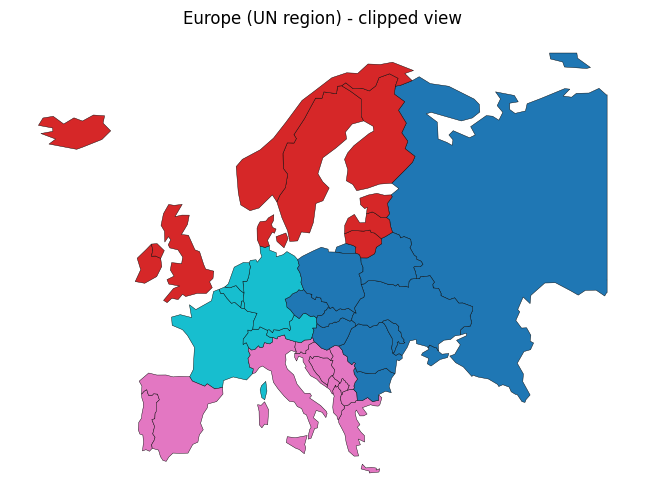

In [77]:
from shapely.geometry import box

europe_df = world_df[world_df["REGION_UN"] == "Europe"]

# 유럽 보기 좋은 bbox (경도, 위도)
bbox = box(-30, 33, 60, 72)   # 필요하면 조금씩 조절

bbox_gdf = gpd.GeoDataFrame(geometry=[bbox], crs=europe_df.crs)
europe_view = gpd.clip(europe_df, bbox_gdf)

fig, ax = plt.subplots(figsize=(12, 6))
europe_view.plot(column='SUBREGION',ax=ax  ,edgecolor="black", linewidth=0.3)

ax.set_title("Europe (UN region) - clipped view")
ax.set_axis_off()
plt.show()

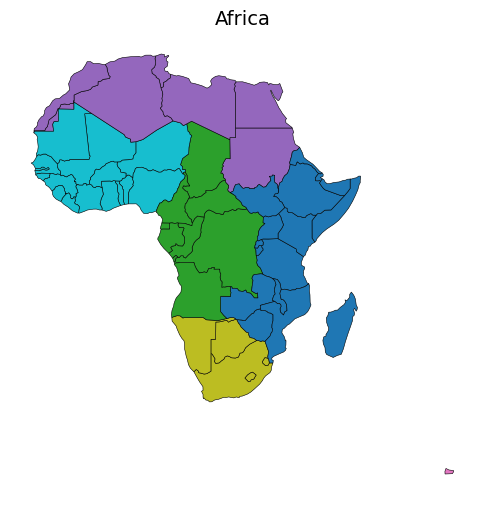

In [82]:
africa_df = world_df[world_df["REGION_UN"] == "Africa"]

fig, ax = plt.subplots(figsize=(10, 6))
africa_df.plot(
    column="SUBREGION",
    ax=ax,
    edgecolor="black",
    linewidth=0.4
)

ax.set_title("Africa", fontsize=14)
ax.set_axis_off()
plt.show()

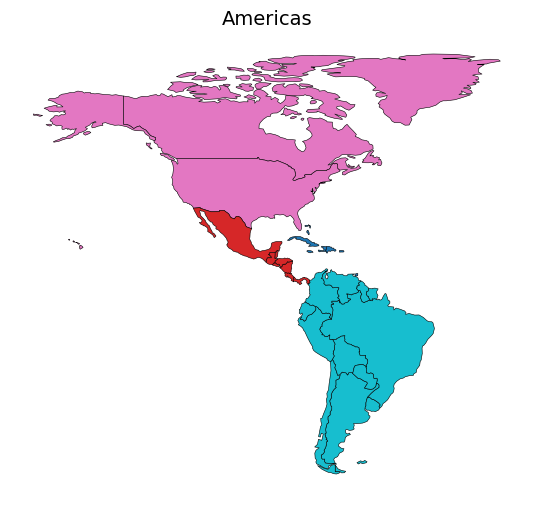

In [81]:
americas_df = world_df[world_df["REGION_UN"] == "Americas"]

fig, ax = plt.subplots(figsize=(10, 6))
americas_df.plot(
    column="SUBREGION",
    ax=ax,
    edgecolor="black",
    linewidth=0.4
)

ax.set_title("Americas", fontsize=14)
ax.set_axis_off()
plt.show()

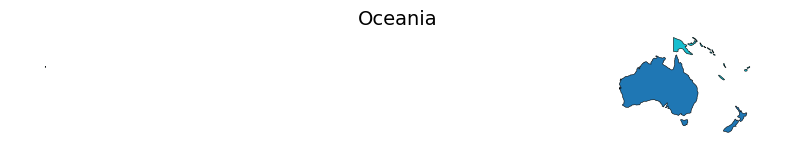

In [83]:
oceania_df = world_df[world_df["REGION_UN"] == "Oceania"]

fig, ax = plt.subplots(figsize=(10, 6))
oceania_df.plot(
    column="SUBREGION",
    ax=ax,
    edgecolor="black",
    linewidth=0.4
)

ax.set_title("Oceania", fontsize=14)
ax.set_axis_off()
plt.show()

## Correlation Analysis

In [ ]:
corr = happiness_2015_df.select_dtypes(include=['int64', 'float64']).corr()

corr

In [ ]:
# visualization
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (2015 Dataset)", fontsize=14)
plt.show()

Happiness score를 기준으로 음의 계수가 Stander Error와 Happiness Rank여서 이후에 진행하는 프로세싱 작업에서 제거해도 무관